# BTC Price Analysis

This notebook explores Bitcoin price trends using minute-level data.

## Steps:
- Load and clean the data
- Convert timestamps to human-readable format
- Plot BTC closing prices
- Analyze daily summary statistics

**Dataset**: btcusd_1-min_data.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/btcusd_1-min_data.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [4]:
df.isnull().sum()
df = df.dropna()

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7057168 entries, 0 to 7057167
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  datetime64[ns]
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Volume     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 323.1 MB


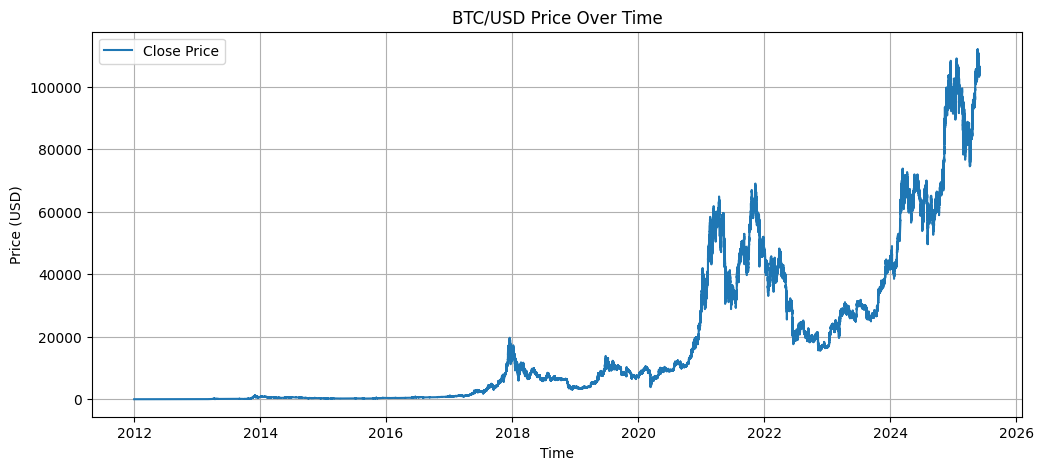

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(df['Timestamp'], df['Close'], label='Close Price')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('BTC/USD Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
df['Date'] = df['Timestamp']
daily_stats = df.groupby('Date')['Close'].agg(['min', 'max', 'mean'])
daily_stats.tail(7)

,min,max,mean
Date,,,
2025-06-03 00:42:00,106209.0,106209.0,106209.0
2025-06-03 00:43:00,106255.0,106255.0,106255.0
2025-06-03 00:44:00,106278.0,106278.0,106278.0
2025-06-03 00:45:00,106349.0,106349.0,106349.0
2025-06-03 00:46:00,106384.0,106384.0,106384.0
2025-06-03 00:47:00,106363.0,106363.0,106363.0
2025-06-03 00:48:00,106323.0,106323.0,106323.0


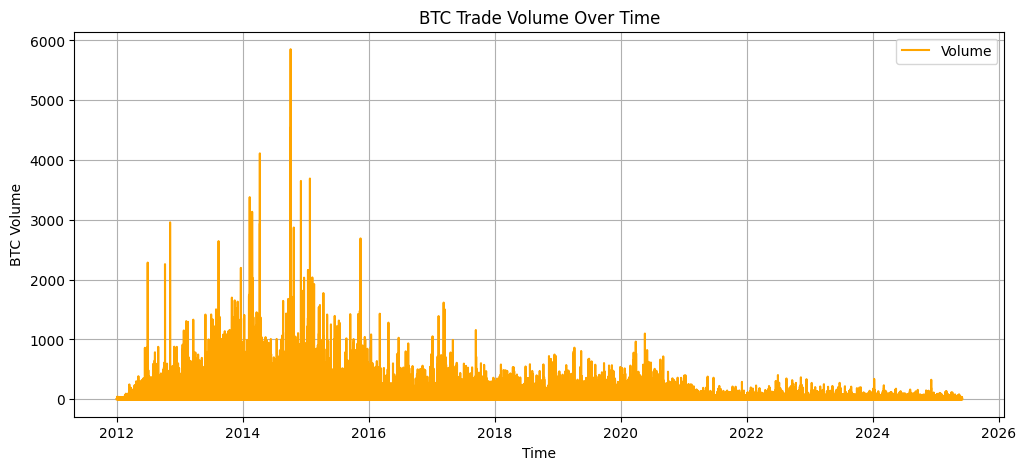

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(df['Timestamp'], df['Volume'], color='orange', label='Volume')
plt.xlabel('Time')
plt.ylabel('BTC Volume')
plt.title('BTC Trade Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()